## Heart Attack Analysis

In [1]:
#Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [3]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

Reading Dataset

This dataset contains data about some hundreds of patients mentioning Age, Sex, Exercise Include Angia(1=YES, 0=NO), Chest Pain Type(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), ECG Results, Blood Pressure, Cholesterol, Blood Sugar, Family History (Number of persons affected in the family), Maximum Heart Rate, Target -0=LESS CHANCE , 1= MORE CHANCE

In [4]:
df = pd.read_csv('./Heart_Attack_Analysis_Data.csv')

# 2.	Data Visualization and Exploration

In [5]:
#cheking for top 5 rows 
df.head(5)

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


In [6]:
#Checking for statistical properities for all attributes 
df.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


In [7]:
#Checking for number of rows and columns in data set 
df.shape

(303, 11)

In [8]:
#Checking for datatypes 
df.dtypes

Age              int64
Sex              int64
CP_Type          int64
BloodPressure    int64
Cholestrol       int64
BloodSugar       int64
ECG              int64
MaxHeartRate     int64
ExerciseAngia    int64
FamilyHistory    int64
Target           int64
dtype: object

In [9]:
#checking for null / missing values across columns 
df.isnull().sum()

Age              0
Sex              0
CP_Type          0
BloodPressure    0
Cholestrol       0
BloodSugar       0
ECG              0
MaxHeartRate     0
ExerciseAngia    0
FamilyHistory    0
Target           0
dtype: int64

In [10]:
#splitting values across categorical and continous
cat_cols = ['Sex','CP_Type','BloodSugar','ECG','ExerciseAngia','FamilyHistory']
con_cols = ["Age","BloodPressure","Cholestrol","MaxHeartRate"]
target_col = ["Target"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['Sex', 'CP_Type', 'BloodSugar', 'ECG', 'ExerciseAngia', 'FamilyHistory']
The continuous cols are :  ['Age', 'BloodPressure', 'Cholestrol', 'MaxHeartRate']
The target variable is :   ['Target']


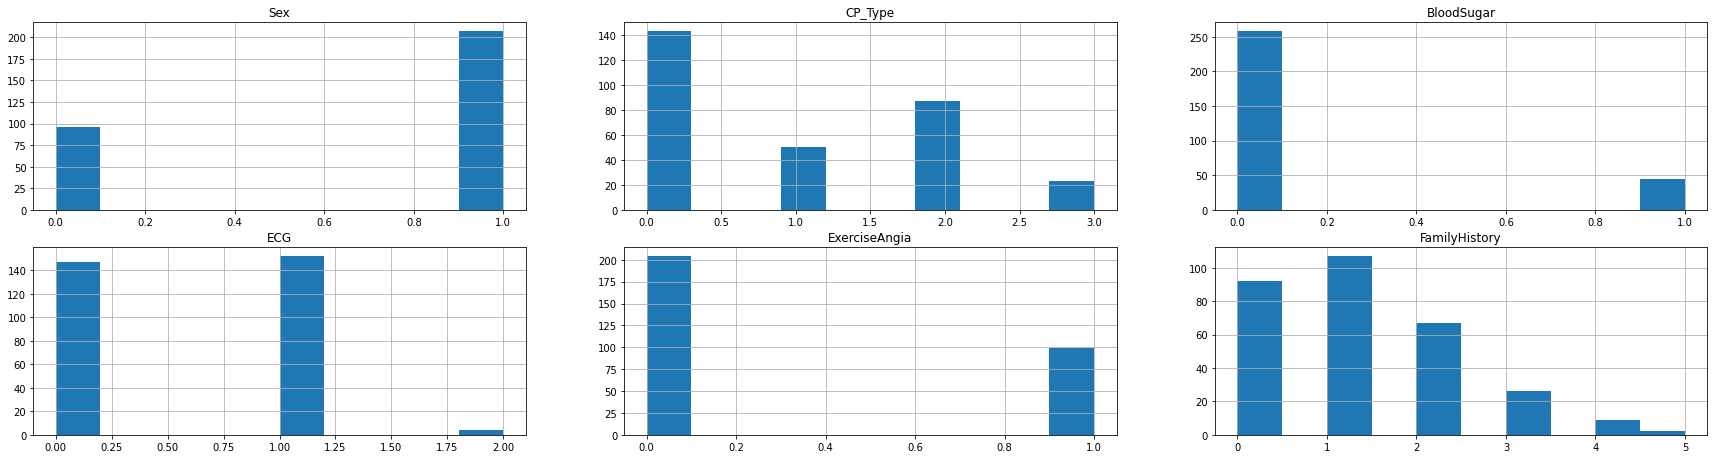

In [11]:
#checking for distribution of categorical columns
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_cols):
    plot.subplot(5,3,i+1)
    df[feature].hist()
    plot.title(feature)

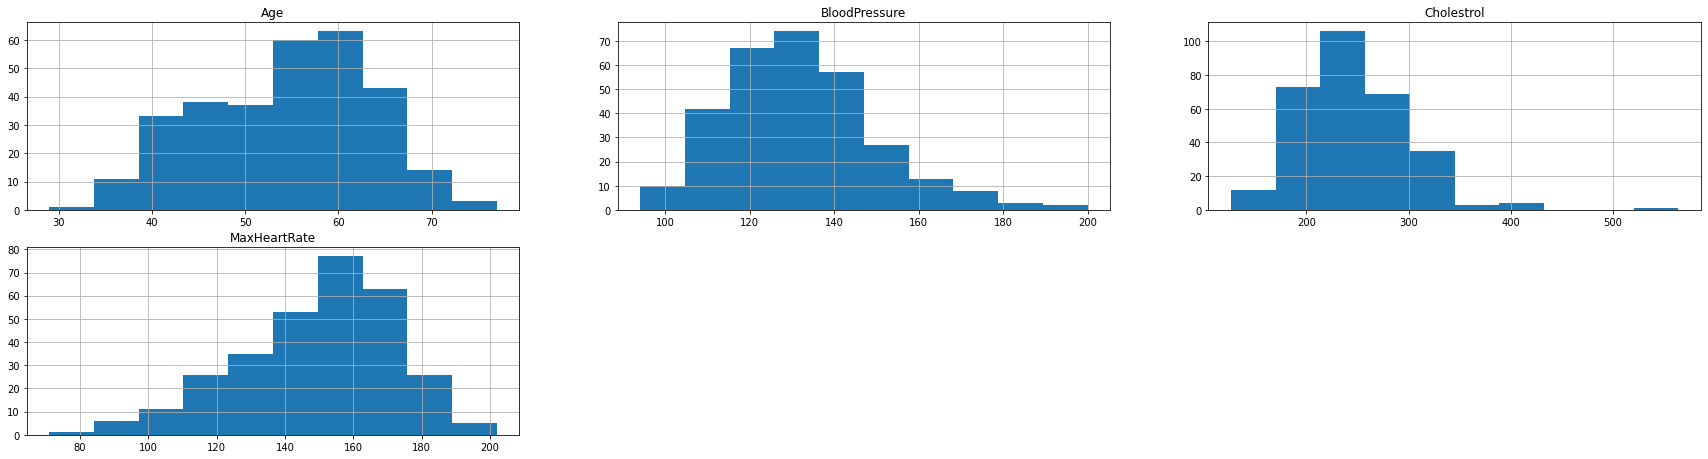

In [12]:
#checking for distribution of continous atrributes
plt.figure(figsize=(30,20))
for i,feature in enumerate(con_cols):
    plot.subplot(5,3,i+1)
    df[feature].hist()
    plot.title(feature)

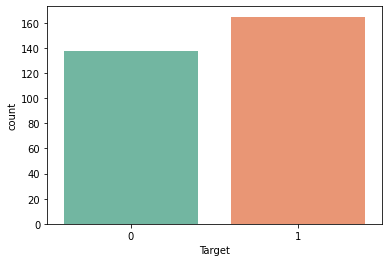

<Figure size 1440x1296 with 0 Axes>

In [13]:
#Checking for imbalance in the dataset - Distribution of target variables
sns.countplot(df.Target,label="count", palette="Set2")
plot.figure(figsize=(20,18))
plot.show()

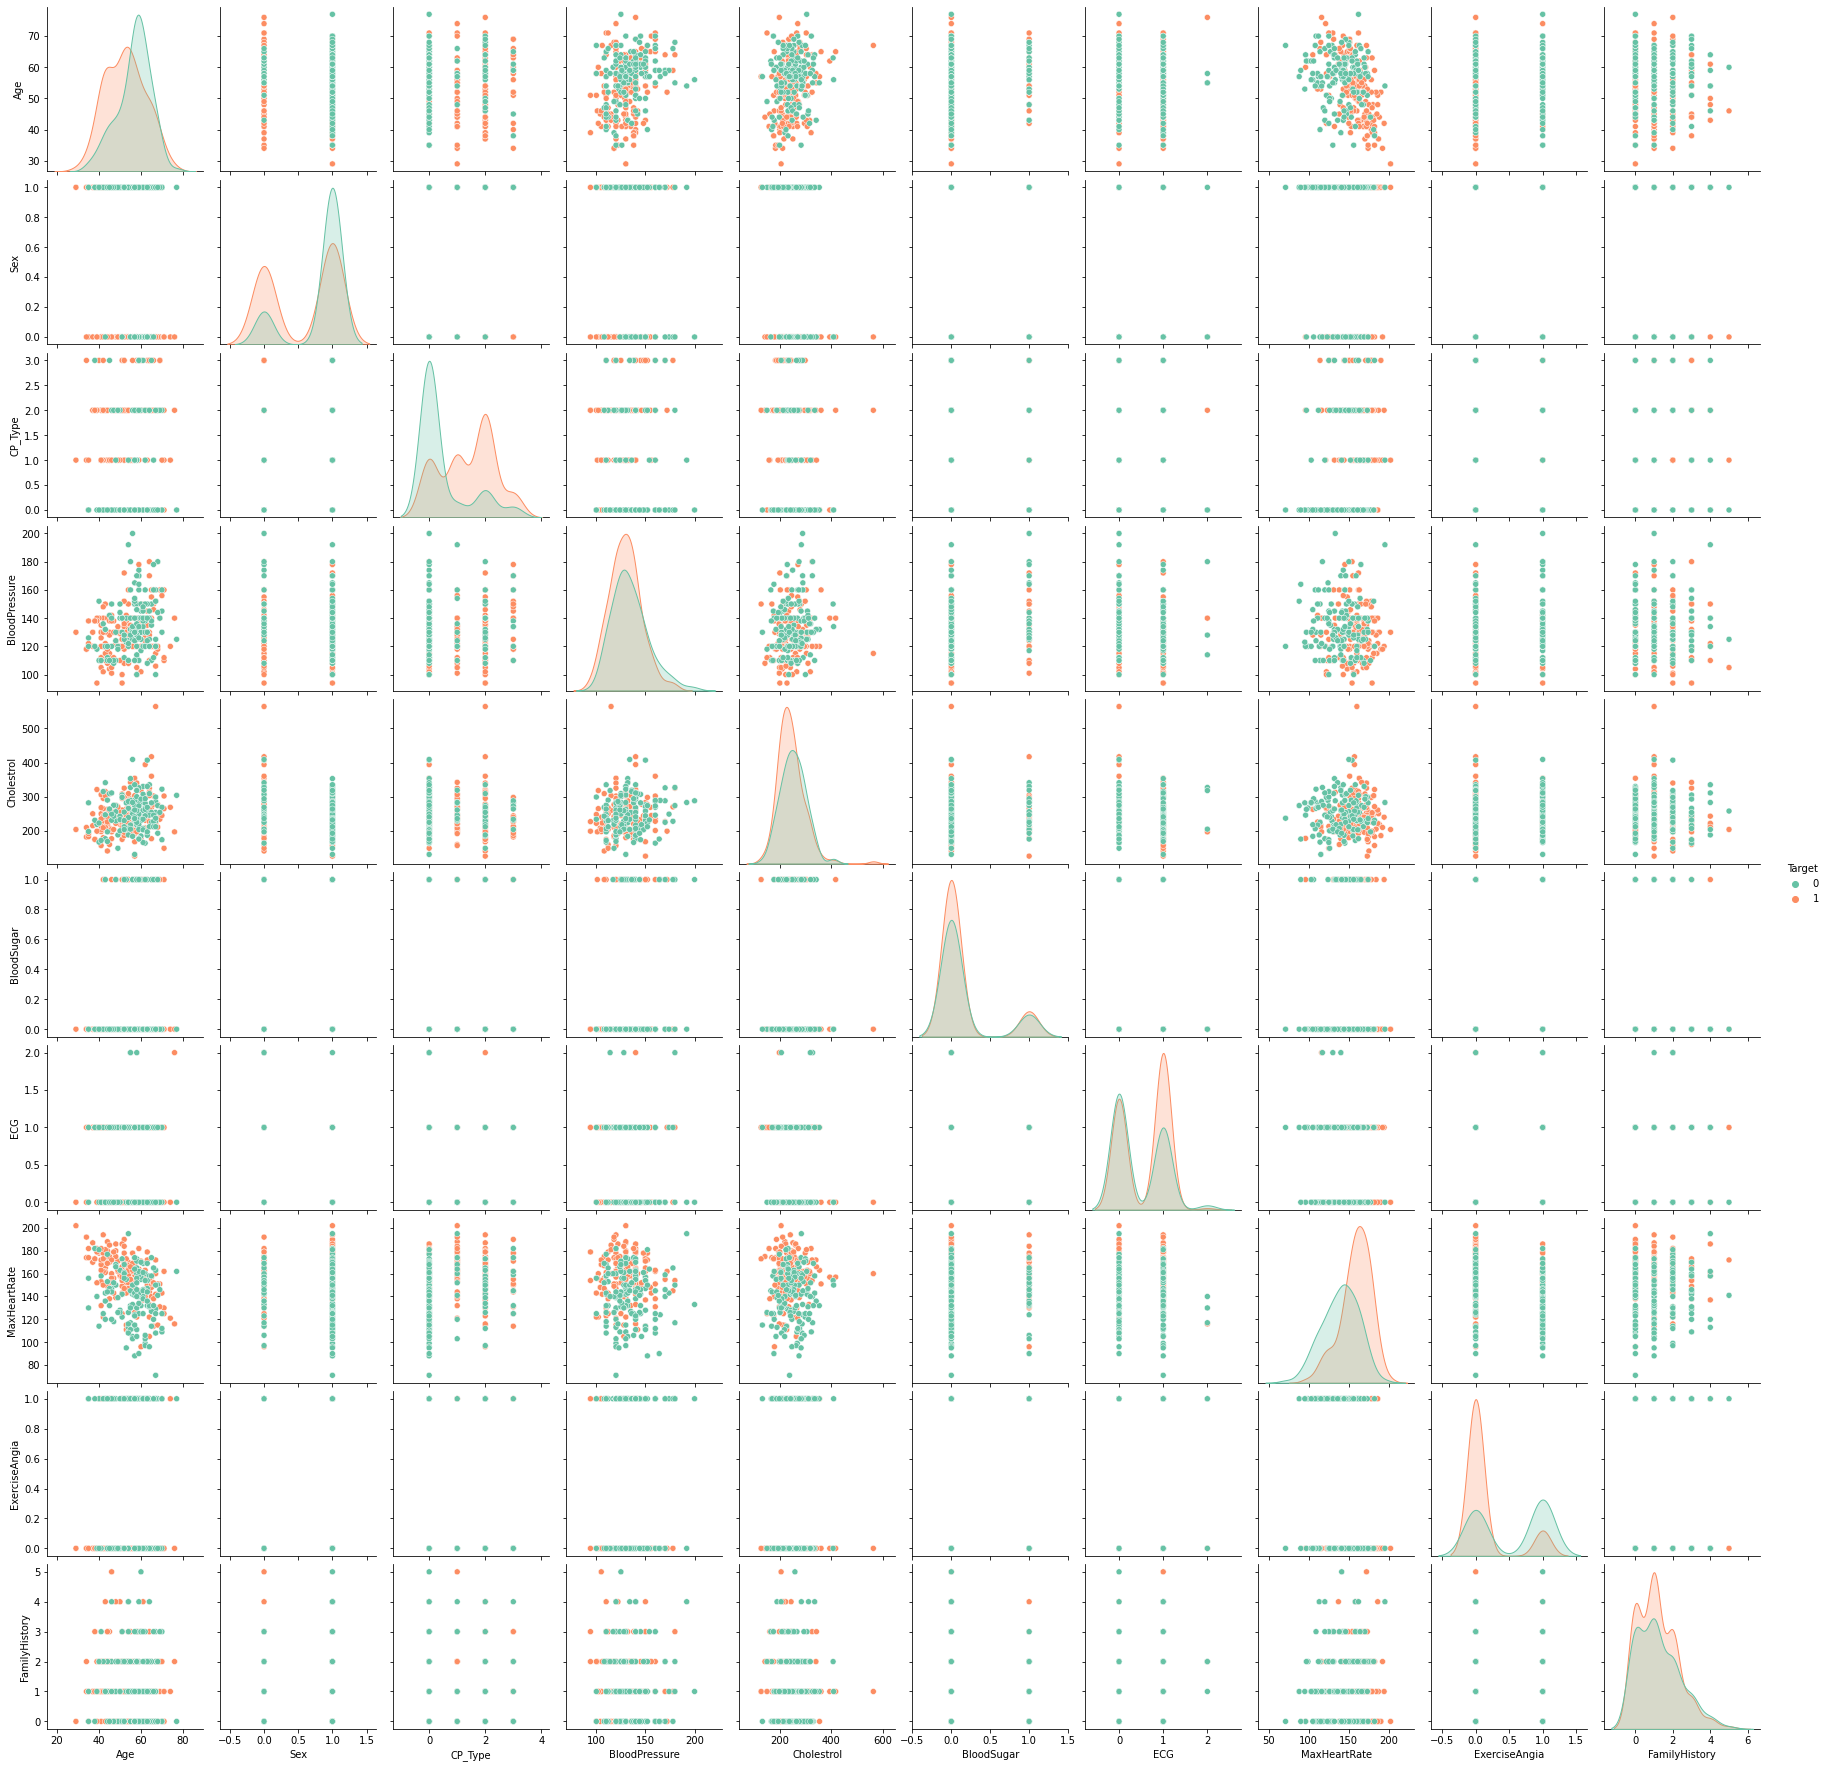

In [14]:
#Plot pairwise relationships in given data-set
sns.pairplot(df,hue="Target", palette="Set2")
plt.show()

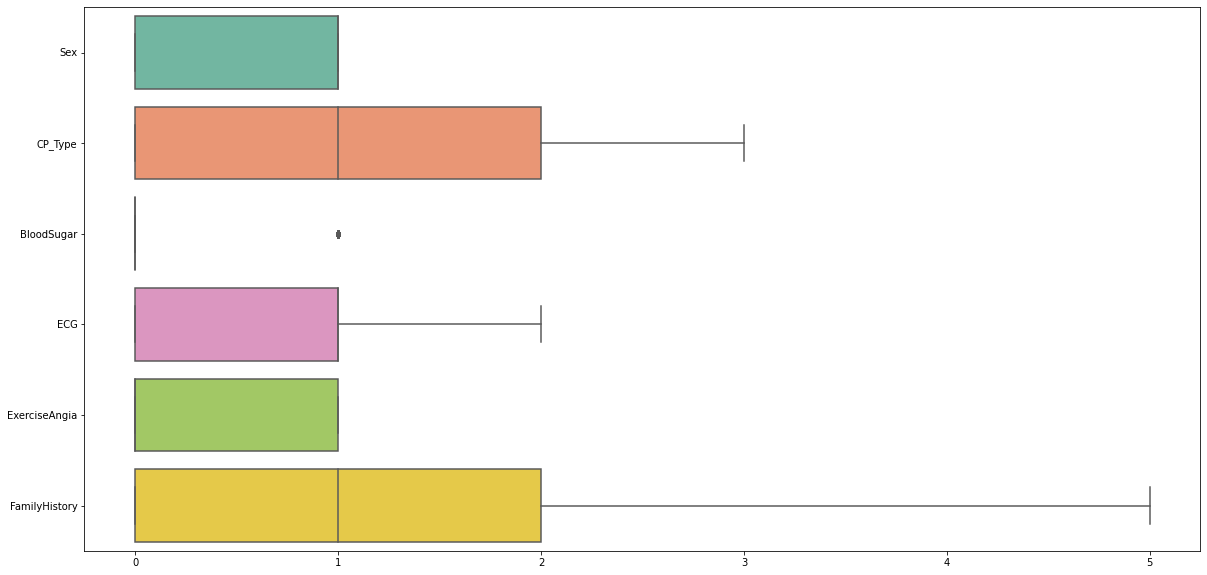

In [15]:
#Checking for outliers
plot.figure(figsize=(20,10))
ax = sns.boxplot(data = df[cat_cols], orient = "h", palette = "Set2")
plot.show()

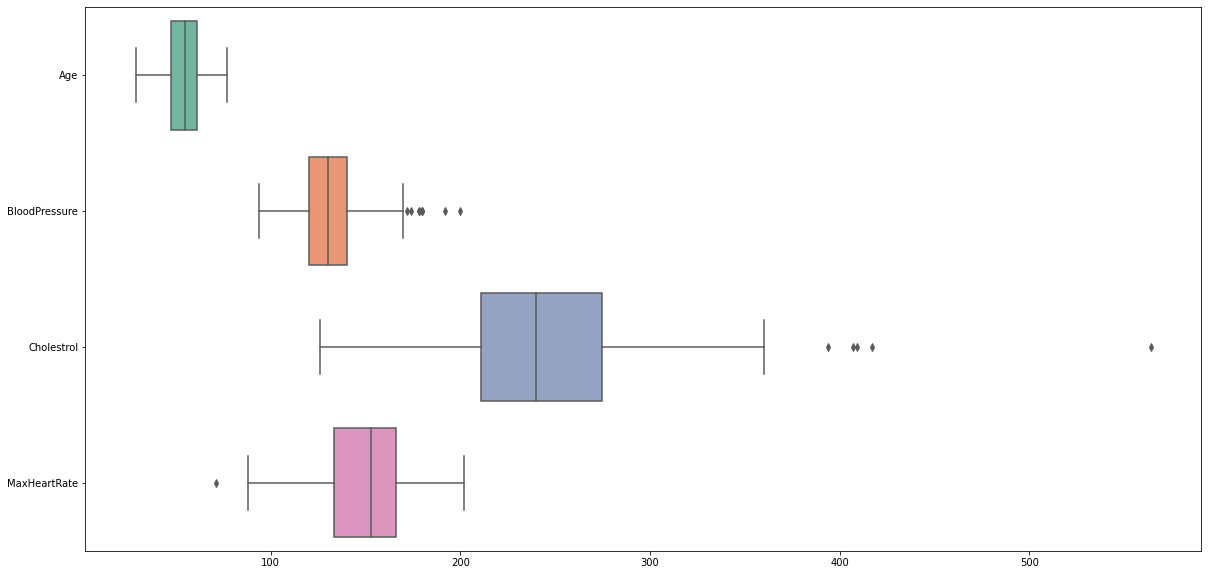

In [16]:
#Checking for outliers
plot.figure(figsize=(20,10))
ax = sns.boxplot(data = df[con_cols], orient = "h", palette = "Set2")
plot.show()

Exploring data for analysis of the following queries:

● Increasing in age has any effect towards heart attack.
● Does increase in cholesterol level in body have any effect towards the heart attack
● Increase in blood pressure have any relation with heart attack
● Does family history have any effect towards heart attack

In [17]:
#Checking for effect of age towards heart attack

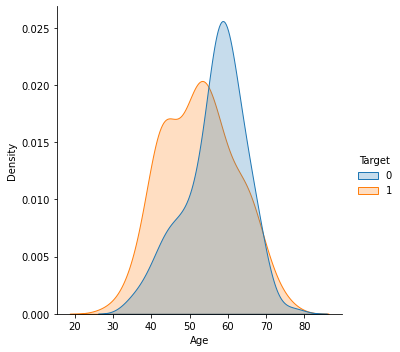

In [18]:
sns.displot(df, x="Age", hue="Target", kind="kde", fill=True)


In [19]:
#Checking for effect of cholestrol towards heart attack

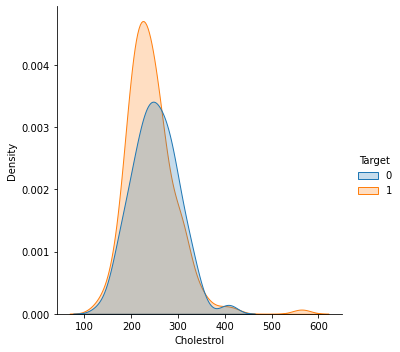

In [20]:
sns.displot(df, x="Cholestrol", hue="Target", kind="kde", fill=True)

In [21]:
#Increase in blood pressure have any relation with heart attack

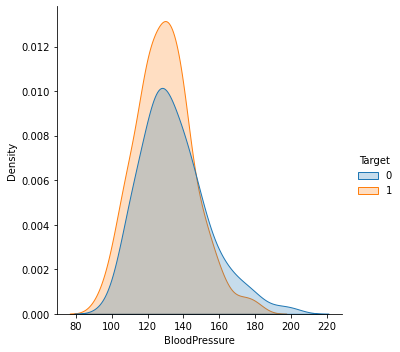

In [22]:
sns.displot(df, x="BloodPressure", hue="Target", kind="kde", fill=True)

In [23]:
#Does family history have any effect towards heart attack

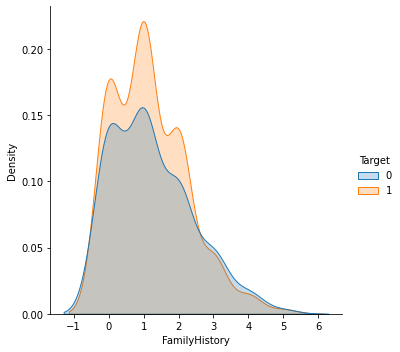

In [24]:
sns.displot(df, x="FamilyHistory", hue="Target", kind="kde", fill=True)

<AxesSubplot:xlabel='CP_Type', ylabel='Density'>

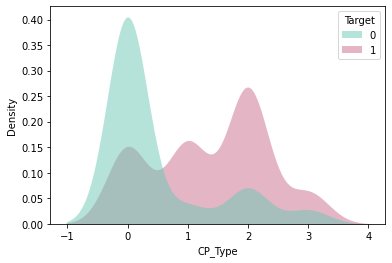

In [25]:
#Chest pain distribution
sns.kdeplot(data=df, x='CP_Type',hue="Target", fill=True, palette=["#6dc9b5","#c96d8d"], alpha=.5, linewidth=0)

<AxesSubplot:xlabel='Sex', ylabel='count'>

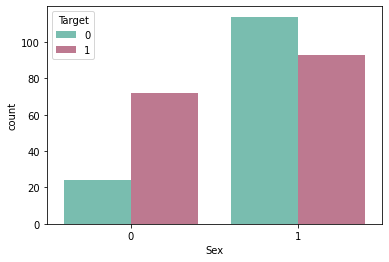

In [26]:
#Attacks based on gender of the patient
sns.countplot(data=df,x='Sex',palette=["#6dc9b5","#c96d8d"], hue='Target')

<AxesSubplot:xlabel='ExerciseAngia', ylabel='Density'>

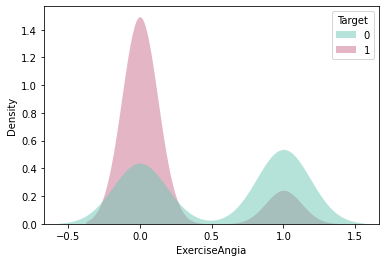

In [27]:
#Checking for effects of ExerciseAngia
sns.kdeplot(data=df, x='ExerciseAngia',hue="Target", fill=True, palette=["#6dc9b5","#c96d8d"], alpha=.5, linewidth=0)

# Analyzing data for Feature Selection

[]

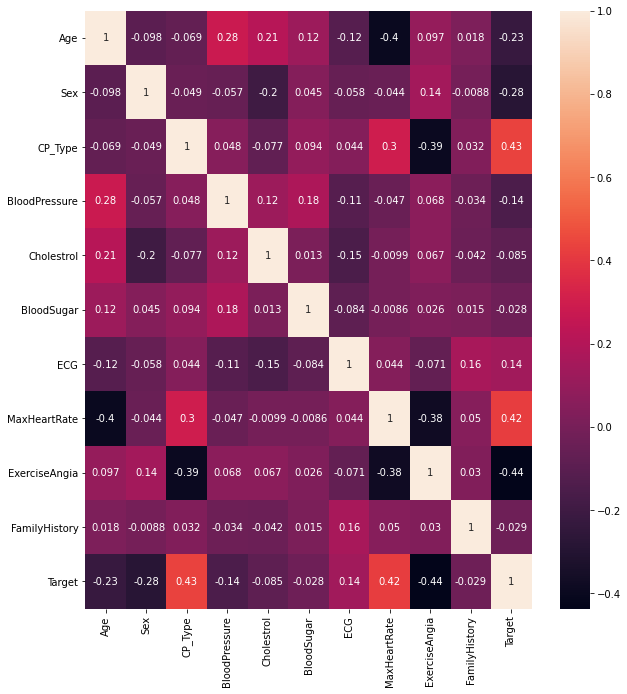

In [28]:
## Correlation Analysis
plot.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Conclusions from the EDA
There are no mkissing values in the data and hence no preprocessing requirements.
There are certain outliers in all the continuous features.
The data consists of more than twice the number of people with sex = 1 than sex = 0.
There is no apparent linear correlation between continuous variable according to the heatmap.
The heatmap matrix suggests that there might be some correlation between Target and Cp_Type, MaxHeartRate and ExerciseAngia.
With increase in Age we would assume the chances of heart attack increases, however with the current data set it could be a possibility for almost all ages.


# 3. Feature Filter Selection

In [29]:
#SelectKBest-to select k best features using Chi2 and ANOVA
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [30]:
#Splitting independent and Dependent Columns
ind_col=[col for col in df.columns if col!='Target']
dep_col='Target'

In [31]:
X=df[ind_col]
y=df[dep_col]

### **Selecting features using Chi2**

In [32]:
#Using SelectKBest and Chi2 to identify the top features based on the ranks
ordered_rank_features=SelectKBest(score_func=chi2,k=5)
ordered_feature=ordered_rank_features.fit(X,y)

In [33]:
ordered_feature

SelectKBest(k=5, score_func=<function chi2 at 0x0000024A3A87DE50>)

In [34]:
ordered_feature.scores_

array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
        23.93639448,   0.20293368,   2.97827075, 188.32047169,
        38.91437697,   0.25053982])

In [35]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,23.286624
1,7.576835
2,62.598098
3,14.823925
4,23.936394
5,0.202934
6,2.978271
7,188.320472
8,38.914377
9,0.250540


In [36]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,Age
1,Sex
2,CP_Type
3,BloodPressure
4,Cholestrol
5,BloodSugar
6,ECG
7,MaxHeartRate
8,ExerciseAngia
9,FamilyHistory


In [37]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [38]:
features_rank

,0,Score
0,Age,23.286624
1,Sex,7.576835
2,CP_Type,62.598098
3,BloodPressure,14.823925
4,Cholestrol,23.936394
5,BloodSugar,0.202934
6,ECG,2.978271
7,MaxHeartRate,188.320472
8,ExerciseAngia,38.914377
9,FamilyHistory,0.250540


In [39]:
#Higher the score is,more important feature is 
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age,23.286624
1,Sex,7.576835
2,CP_Type,62.598098
3,BloodPressure,14.823925
4,Cholestrol,23.936394
5,BloodSugar,0.202934
6,ECG,2.978271
7,MaxHeartRate,188.320472
8,ExerciseAngia,38.914377
9,FamilyHistory,0.250540


In [40]:
#fetch largest 10 values of Score column
features_rank.nlargest(6,'Score')

,Features,Score
7,MaxHeartRate,188.320472
2,CP_Type,62.598098
8,ExerciseAngia,38.914377
4,Cholestrol,23.936394
0,Age,23.286624
3,BloodPressure,14.823925


In [41]:
selected_columns_chi=features_rank.nlargest(6,'Score')['Features'].values

### **Selecting features using ANOVA f-test Feature Selection**

In [42]:
ordered_rank_features=SelectKBest(score_func=f_classif, k='all')
ordered_feature=ordered_rank_features.fit(X,y)

In [43]:
ordered_feature

SelectKBest(k='all')

In [44]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,16.116700
1,25.792191
2,69.772271
3,6.458169
4,2.202983
5,0.236942
6,5.777209
7,65.120104
8,70.952438
9,0.250249


In [45]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [46]:
features_rank

,0,Score
0,Age,16.116700
1,Sex,25.792191
2,CP_Type,69.772271
3,BloodPressure,6.458169
4,Cholestrol,2.202983
5,BloodSugar,0.236942
6,ECG,5.777209
7,MaxHeartRate,65.120104
8,ExerciseAngia,70.952438
9,FamilyHistory,0.250249


In [47]:
#Higher the score is,more important feature is 
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age,16.116700
1,Sex,25.792191
2,CP_Type,69.772271
3,BloodPressure,6.458169
4,Cholestrol,2.202983
5,BloodSugar,0.236942
6,ECG,5.777209
7,MaxHeartRate,65.120104
8,ExerciseAngia,70.952438
9,FamilyHistory,0.250249


In [48]:
#fetch largest 10 values of Score column
features_rank.nlargest(6,'Score')

,Features,Score
8,ExerciseAngia,70.952438
2,CP_Type,69.772271
7,MaxHeartRate,65.120104
1,Sex,25.792191
0,Age,16.116700
3,BloodPressure,6.458169


In [49]:
selected_columns_fSelect=features_rank.nlargest(6,'Score')['Features'].values

In [50]:
#indpendant columns arrived using Chi2
X_Chi=df[selected_columns_chi]

In [51]:
#independant columns arrived using ANOVA
X_Annova=df[selected_columns_fSelect]

In [52]:
print('Columns selected through Chi2')
print (selected_columns_chi)
print('Columns selected through Annova fSelect')
print(selected_columns_fSelect)

Columns selected through Chi2
['MaxHeartRate' 'CP_Type' 'ExerciseAngia' 'Cholestrol' 'Age'
 'BloodPressure']
Columns selected through Annova fSelect
['ExerciseAngia' 'CP_Type' 'MaxHeartRate' 'Sex' 'Age' 'BloodPressure']


# 3. Model Building

Provide a high-level description of Machine Learning models – Gradient Boosting classifier and Random Forest to predict.

In [53]:
from sklearn.model_selection import train_test_split
#using features from Chi2 filtering
X_train, X_test, y_train, y_test = train_test_split(X_Chi,y,train_size=0.75)

In [54]:
#Checking for split between Train and Test
print(X_train.shape)
print(X_test.shape)

(227, 6)
(76, 6)


In [55]:
## check whether dataset is imbalance or not
y_train.value_counts()

1    119
0    108
Name: Target, dtype: int64

In [56]:
#Fitting model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [57]:
#predictin the test result
y_pred_rfc = rfc.predict(X_test) 

In [58]:
#calculate accuracy
score_rfc = accuracy_score(y_pred_rfc,y_test)
score_rfc

0.7368421052631579

In [59]:
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

train score - 0.7973568281938326
test score - 0.7368421052631579


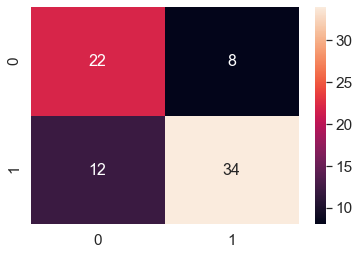

In [60]:
#Making the Confusion Matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_rfc, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [61]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        30
           1       0.81      0.74      0.77        46

    accuracy                           0.74        76
   macro avg       0.73      0.74      0.73        76
weighted avg       0.75      0.74      0.74        76



In [62]:
#Fitting model using GradientBosstingClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

In [63]:
#predictin the test result
y_pred_clf = clf.predict(X_test) 

In [64]:
#calculate accuracy
score_clf = accuracy_score(y_pred_clf,y_test)
score_clf

0.7236842105263158

In [65]:
print("train score - " + str(clf.score(X_train, y_train)))
print("test score - " + str(clf.score(X_test, y_test)))

train score - 0.8898678414096917
test score - 0.7236842105263158


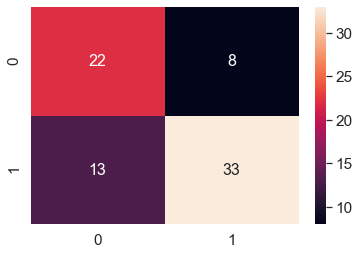

In [66]:
#Making the Confusion Matrix
cm_clf = confusion_matrix(y_test,y_pred_clf)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_clf, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [67]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        30
           1       0.80      0.72      0.76        46

    accuracy                           0.72        76
   macro avg       0.72      0.73      0.72        76
weighted avg       0.74      0.72      0.73        76



In [68]:
#using features from Annova Fselect filtering
X_train, X_test, y_train, y_test = train_test_split(X_Annova,y,train_size=0.75)

In [69]:
print(X_train.shape)
print(X_test.shape)

(227, 6)
(76, 6)


In [70]:
## check whether dataset is imbalance or not
y_train.value_counts()

1    127
0    100
Name: Target, dtype: int64

In [71]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

train score - 0.8105726872246696
test score - 0.75


In [73]:
#predictin the test result
y_pred_rfc = rfc.predict(X_test) 
#calculate accuracy
score_rfc = accuracy_score(y_pred_rfc,y_test)
score_rfc

0.75

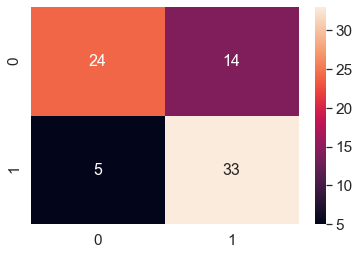

In [74]:
#Making the Confusion Matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_rfc, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [75]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.70      0.87      0.78        38

    accuracy                           0.75        76
   macro avg       0.76      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76



In [76]:
clf = GradientBoostingClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

In [77]:
#predictin the test result
y_pred_clf = clf.predict(X_test) 

In [78]:
#calculate accuracy
score_clf = accuracy_score(y_pred_clf,y_test)
score_clf

0.7105263157894737

In [79]:
print("train score - " + str(clf.score(X_train, y_train)))
print("test score - " + str(clf.score(X_test, y_test)))

train score - 0.8854625550660793
test score - 0.7105263157894737


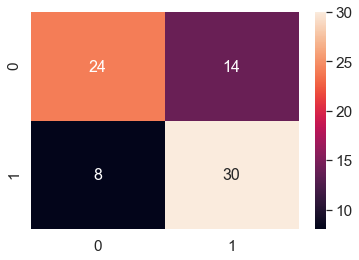

In [80]:
#Making the Confusion Matrix
cm_clf = confusion_matrix(y_test,y_pred_clf)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_clf, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [81]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.68      0.79      0.73        38

    accuracy                           0.71        76
   macro avg       0.72      0.71      0.71        76
weighted avg       0.72      0.71      0.71        76



# Conclusion

Filtering based on Chi2 gives better accuracy in terms of predicting Heart Attacks with about 81% accuracy. 
Both Gradient Boosting classifier and Random Forest have similar outcome in terms of prediction, with Random Forest giving better accuracy in comparison with Gradient Boosting Classifier.
If there are more number of instances provided for training - the accuracy of the model can be improved.